# Preparing

In [296]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from prettytable import PrettyTable

In [297]:
#read the data from the github repository
data_url = 'https://raw.githubusercontent.com/mkjubran/AIData/main/HeartDisease.csv'
df = pd.read_csv(data_url)
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [298]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [299]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [300]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

# Filling the messing values

In [301]:
# education feature
# fill the missing values with the mode
print('Number of NaN before: ' + str(df['education'].isnull().sum()))
df['education'].fillna(str(df['education'].mode()[0]), inplace=True)
print('Number of NaN after: ' + str(df['education'].isnull().sum()))

Number of NaN before: 105
Number of NaN after: 0


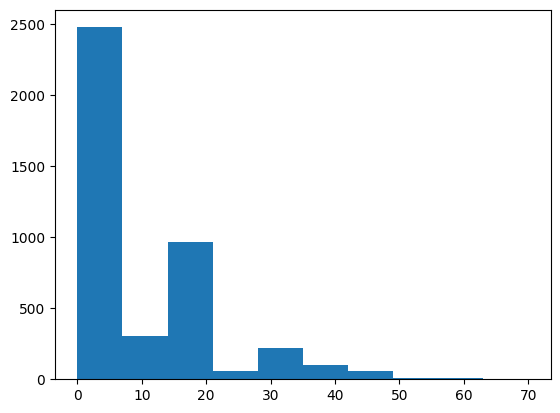

Number of NaN before: 29
Number of NaN after: 0


In [302]:
# cigsPerDay feature
plt.hist(df['cigsPerDay'])
plt.show()
# fill the missing with the mean
print('Number of NaN before: ' + str(df['cigsPerDay'].isnull().sum()))
df['cigsPerDay'].fillna(df['cigsPerDay'].mean(), inplace=True)
print('Number of NaN after: ' + str(df['cigsPerDay'].isnull().sum()))

(array([4061.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         124.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

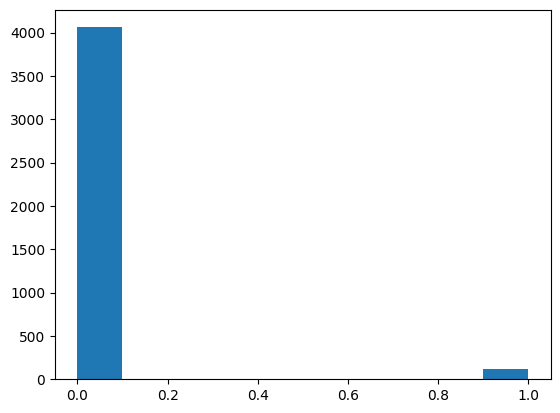

In [303]:
# BPMeds feature
plt.hist(df['BPMeds'])

In [304]:
# fill the missing with the mode
print('Number of NaN before: ' + str(df['BPMeds'].isnull().sum()))
df['BPMeds'].fillna(df['BPMeds'].mode()[0], inplace=True)
print('Number of NaN afetr: ' + str(df['BPMeds'].isnull().sum()))

Number of NaN before: 53
Number of NaN afetr: 0


There is high correlation b/t the totChol and age feature.

In [305]:
# fill the missing values totChol feature with the mean
print('Number of NaN before: ' + str(df['totChol'].isnull().sum()))
df['totChol'].fillna(value=df['totChol'].mean(), inplace=True)
print('Number of NaN after: ' + str(df['totChol'].isnull().sum()))

Number of NaN before: 50
Number of NaN after: 0


In [306]:
# BMI and glucose features
# fill with the mean
df['BMI'].fillna(value=df['BMI'].mean(), inplace=True)
df['glucose'].fillna(value=df['glucose'].mean(), inplace=True)

In [307]:
# heart rate feature
# fill the missing values with the mode
df['heartRate'].fillna(value=df['heartRate'].mode()[0], inplace=True)

# Feature Engineering

In [308]:
df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,0.494101,9.003089,0.029259,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878716,81.966753,0.151958
std,0.495022,8.572160,0.500024,11.879230,0.168552,0.076587,0.462763,0.158316,44.326453,22.038097,11.910850,4.070953,12.025185,22.836603,0.359023
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


No categorical data need to be encoded

In [309]:
# x for features only
x = df.drop('TenYearCHD', axis=1)
# y for label only
y = df['TenYearCHD']

In [310]:
# split the data into train and  test data 
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [311]:
print('Training Data:\nx: ' + str(x_train.shape) + '\ny: ' + str(len(y_train)))
print('\n\nTesting Data:\nx: ' + str(x_test.shape) + '\ny: ' + str(len(y_test)))

Training Data:
x: (3178, 15)
y: 3178


Testing Data:
x: (1060, 15)
y: 1060


# Build and evaluate the model

In [312]:
# build and train the model
logm = LogisticRegression()
logm.fit(x_train, y_train)

c:\Users\ammar.abughazaleh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [313]:
t = PrettyTable(['Phase', 'Model Score'])
t.add_row(['Training', str(round(100 * logm.score(x_train, y_train), 2)) + ' %'])
t.add_row(['Testing', str(round(100 * logm.score(x_test, y_test), 2)) + ' %'])
print(t)

+----------+-------------+
|  Phase   | Model Score |
+----------+-------------+
| Training |   84.83 %   |
| Testing  |   85.57 %   |
+----------+-------------+
